Importing Necessary Libraries

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from matplotlib import pyplot as plt

Loading Dataset

In [27]:
df=pd.read_excel('employee_burnout_analysis-AI.xlsx')

Data Overview

In [28]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [29]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [30]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [31]:
df.columns.to_list()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [32]:
df.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [34]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Exploratory Data Analysis(EDA)

In [35]:
df.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

In [36]:
df.dropna(inplace=True)

In [37]:
df.drop('Employee ID',axis='columns',inplace=True)

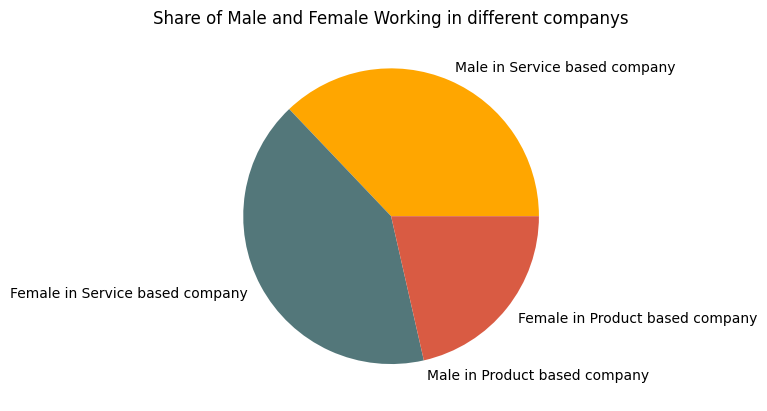

In [38]:
plt.pie(
    [
        df[(df['Company Type']=='Service') & (df['Gender']=='Male')].shape[0],
        df[(df['Company Type']=='Service') & (df['Gender']=='Female')].shape[0],
        df[(df['Company Type']=='product') & (df['Gender']=='Male')].shape[0],
        df[(df['Company Type']=='Product') & (df['Gender']=='Female')].shape[0]
    ],
    labels=['Male in Service based company','Female in Service based company','Male in Product based company','Female in Product based company'],
    colors=["#ffa600", "#53777a", "#c02942", "#d95b43"],

    )
plt.title('Share of Male and Female Working in different companys')
plt.show()

Analyze DataTypes

In [39]:
df.dtypes

Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [40]:
if all(col in df.columns for col in ['Company Type','WFH Setup Available','Gender']):
    df=pd.get_dummies(df,columns=['Company Type', 'WFH Setup Available','Gender'],drop_first=True )
    df.head()
    encoded_columns=df.columns
else:
    print('One or more Specified Columns are missing in the present DataFrame')
                        

In [41]:
df.drop(['Date of Joining'],inplace=True,axis='columns')

Preprocessing

In [42]:
#split
y=df['Burn Rate']
X=df.drop('Burn Rate',axis='columns')

In [43]:
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)

In [44]:
#Scale X
scaler=StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

In [45]:
X_train.dropna(inplace=True)

In [46]:
y_train.dropna(inplace=True)

Linear Regression

In [47]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [48]:
print("Model Evaluation Mterics")
y_pred=linear_regression_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse,sep=' ')
rmse=mean_squared_error(y_test,y_pred,squared=False)
print("Root Mean Squared Error",rmse,sep=' ')
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error",mae,sep=' ')
r2=r2_score(y_test,y_pred)
print("R-Squared Error",r2)

Model Evaluation Mterics
Mean Squared Error: 0.003156977911361073
Root Mean Squared Error 0.056186990588223115
Mean Absolute Error 0.04595032032644773
R-Squared Error 0.918822674247248


c:\Users\chall\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
